In [1]:
import pandas as pd
import pandas_profiling
%matplotlib inline

# Generación bruta de energía por proceso (México)

## Fuente

Sistema de Información Energética con información de CFE y la extinta LyFC.

In [2]:
df = pd.read_csv("data/zvufdwnieb_IIIA1C02_16012018_21_52.csv", na_values="N/D")
df = df[["Fecha", "Termo", "Hidroeléctrica", "Eólica"]]

## Preproceso de datos

Parseo de fechas

In [3]:
months = [
    ("Ene", "01"),
    ("Feb", "02"),
    ("Mar", "03"),
    ("Abr", "04"),
    ("May", "05"),
    ("Jun", "06"),
    ("Jul", "07"),
    ("Ago", "08"),
    ("Sep", "09"),
    ("Oct", "10"),
    ("Nov", "11"),
    ("Dic", "12")
]

for month, n in months:
    df["Fecha"] = df["Fecha"].str.replace(month, n)

df["Fecha"] = pd.to_datetime(df["Fecha"], format="%m/%Y")
df =df.set_index("Fecha")

Convertir de MWh a TWh

In [4]:
for c in ["Termo", "Hidroeléctrica", "Eólica"]:
    df[c] = df[c]/1e6

In [5]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="output/pdp_report.html")
profile

Number of variables,4
Number of observations,191
Total Missing (%),0.0%
Total size in memory,6.0 KiB
Average record size in memory,32.4 B
Numeric,3
Categorical,0
Date,1
Text (Unique),0
Rejected,0
Distinct count,191


Text(0,0,'Fuente: Sistema de Información Energética con información de CFE y la extinta LyFC.')

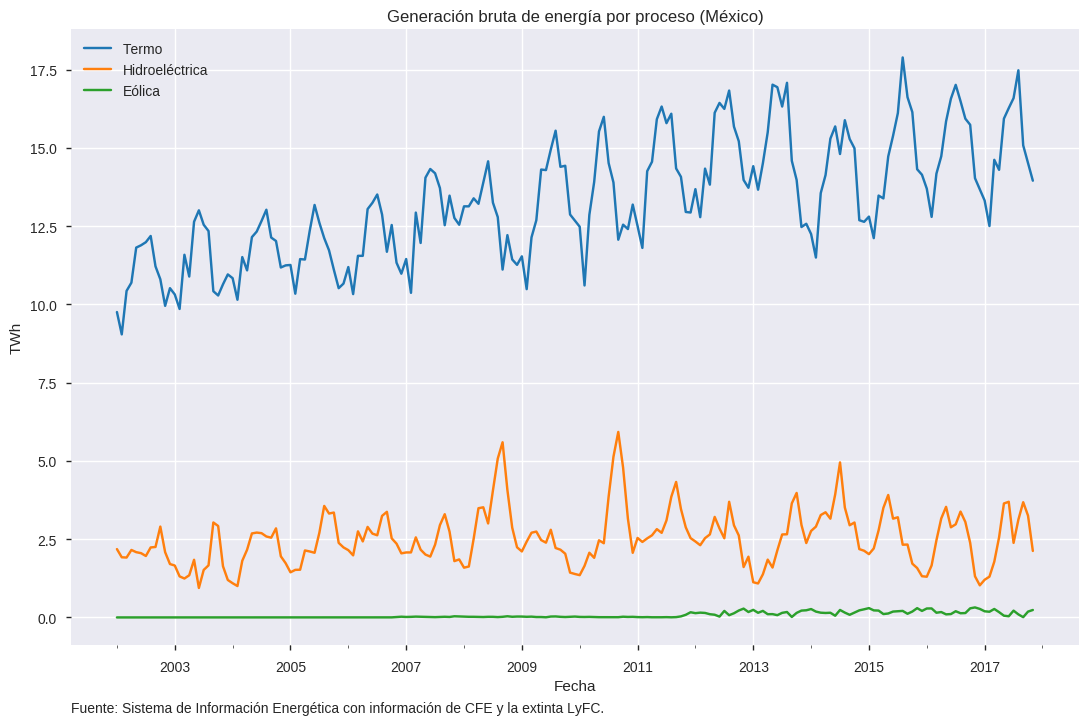

In [6]:
ax = df.plot(figsize=(13,8), title="Generación bruta de energía por proceso (México)")
ax.set_ylabel("TWh")
ax.annotate('Fuente: Sistema de Información Energética con información de CFE y la extinta LyFC.', 
            (0,-40), (0, 0), xycoords='axes points', textcoords='offset points', va='top')

Text(0,0,'Fuente: Sistema de Información Energética con información de CFE y la extinta LyFC.')

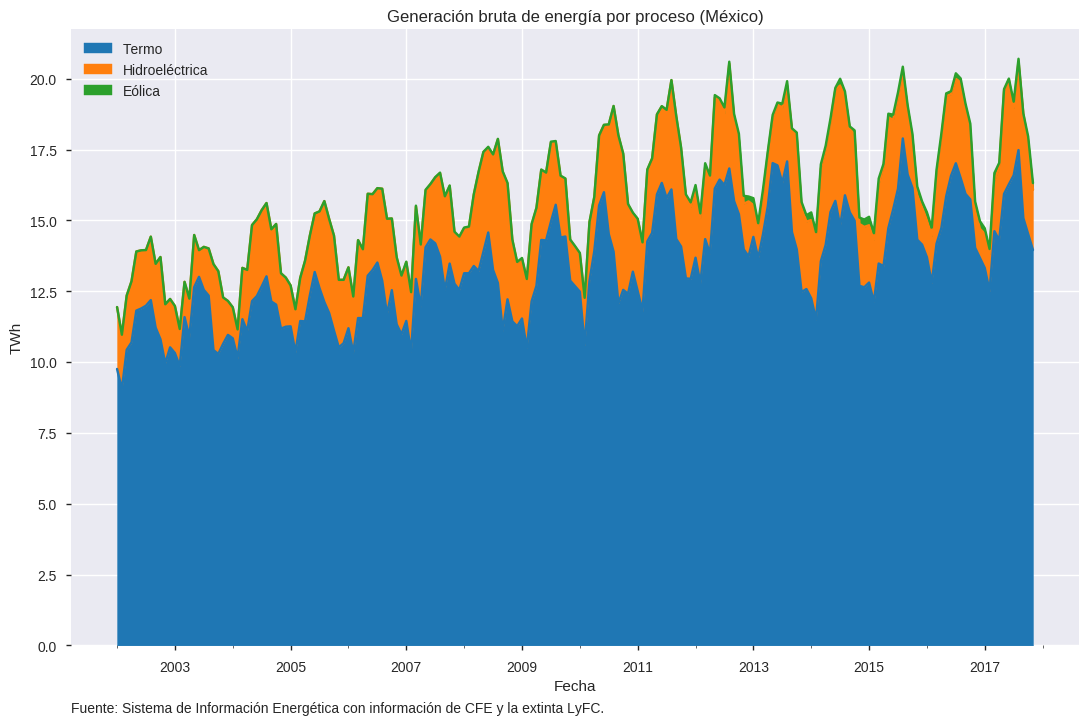

In [7]:
ax = df.plot(figsize=(13,8), kind="area", title="Generación bruta de energía por proceso (México)")
ax.set_ylabel("TWh")
ax.annotate('Fuente: Sistema de Información Energética con información de CFE y la extinta LyFC.', 
            (0,-40), (0, 0), xycoords='axes points', textcoords='offset points', va='top')

Text(0,0,'Fuente: Sistema de Información Energética con información de CFE y la extinta LyFC.')

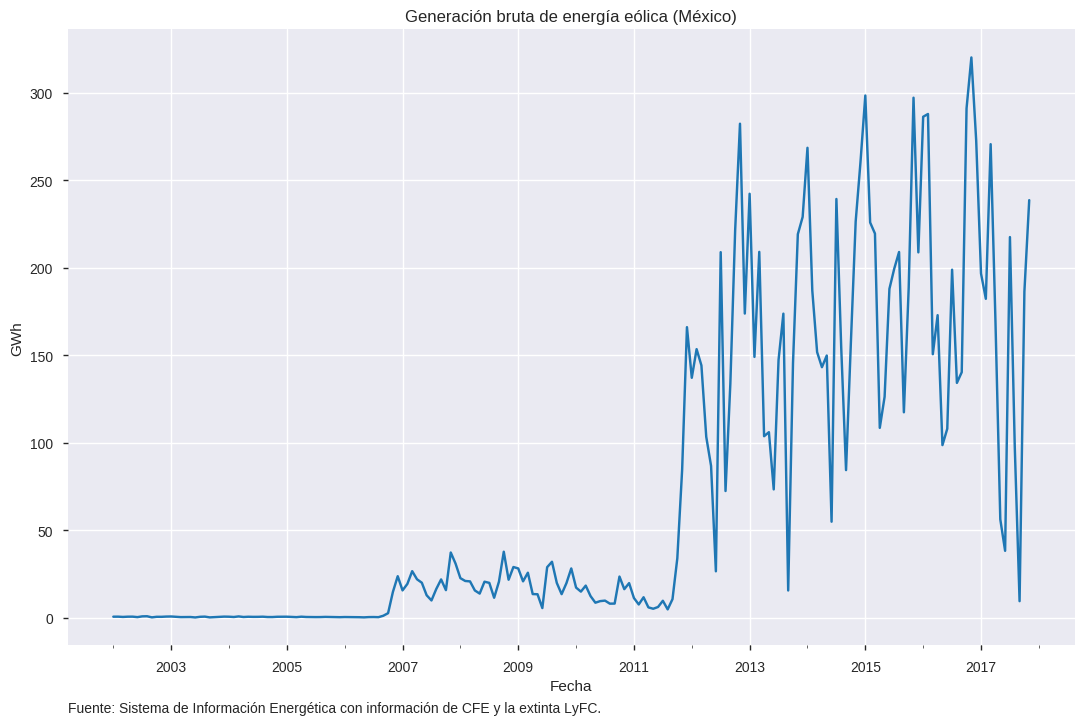

In [8]:
ax = (df["Eólica"]*1e3).plot(figsize=(13,8), title="Generación bruta de energía eólica (México)")
ax.set_ylabel("GWh")
ax.annotate('Fuente: Sistema de Información Energética con información de CFE y la extinta LyFC.', 
            (0,-40), (0, 0), xycoords='axes points', textcoords='offset points', va='top')